# Loan Payment and Amortization Calculator

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def pmt(principal, rate, term):
    """
       Calculates the payment on a loan.
       
       Returns the payment amount on a loan given
       the principal, the interest rate (as an APR),
       and the term in months.
    """
    
    ratePerTwelve = rate / (12 * 100.0)
    
    result = principal * (ratePerTwelve / (1 - (1 + ratePerTwelve) ** (-term)))
    
    # Round off to two decimal places
    result = round(result, 2)
    return result

pmt(100000, 5, 120)

1060.66

In [3]:
def amorization_table(principal, rate, payments, payments_year):
    """
       Prints the amortization table for a loan.
       
       Prints the amortization table for a loan given 
       the principal, the interest rate (as an APR), and
       the term (in months).
    """
    
    amortization = {"index": [],
                    "begBal": [],
                    "payment": [],
                    "applied": [],
                    "interest": [],
                    "endBal": [],
                    "total_pay": [],
                    "total_int": [],
                    }
    
    payment = pmt(principal, rate, payments)
    print("Payment: {}".format(payment))
    begBal = principal
    total_int = 0
    total_pay = 0
    
    # Print headers
    print('Pmt no'.rjust(6), ' ', 'Beg. bal.'.ljust(13), end=' ')
    print('Payment'.ljust(9), ' ', 'Principal'.ljust(9), end=' ')
    print('Interest'.rjust(11), ' ', 'End. bal.'.ljust(11), end='')
    print('Total Pay'.rjust(12), ' ', 'Total Int'.rjust(12))
    print(''.rjust(6, '-'), ' ', ''.ljust(13, '-'), end=' ')
    print(''.rjust(11, '-'), ' ', ''.ljust(9, '-'), end=' ')
    print(''.rjust(9, '-'), ' ', ''.ljust(13, '-'), end=' ')
    print(''.rjust(12, '-'), ' ', ''.rjust(12, '-'))
    
    # Print Data
    for num in range(1, payments + 1):
        interest = round(begBal * (rate / (payments_year * 100.0)), 2)
        applied = round(payment - interest, 2)
        endBal = round(begBal - applied, 2)
        total_pay += applied
        total_int += interest
        
        print(str(num).center(6), end=' ')
        print('{0:,.2f}'.format(begBal).rjust(13), end=" ")
        print('{0:,.2f}'.format(payment).rjust(11), end=" ")
        print('{0:,.2f}'.format(applied).rjust(11), end=" ")
        print('{0:,.2f}'.format(interest).rjust(11), end=' ')
        print('{0:,.2f}'.format(endBal).rjust(13), end=' ')
        print('{0:,.2f}'.format(total_pay).rjust(12), end=' ')
        print('{0:,.2f}'.format(total_int).rjust(12))
        
        amortization["index"].append(num)
        amortization["begBal"].append(begBal)
        amortization["payment"].append(payment)
        amortization["applied"].append(applied)
        amortization["interest"].append(interest)
        amortization["endBal"].append(endBal)
        amortization["total_pay"].append(total_pay)
        amortization["total_int"].append(total_int)
        begBal = endBal
        
    return amortization

    
amor = amorization_table(800000, 5, 360, 12)
payments = [x for x in range(1, 12 + 1)]
print(payments)

Payment: 4294.57
Pmt no   Beg. bal.     Payment     Principal    Interest   End. bal.     Total Pay      Total Int
------   ------------- -----------   --------- ---------   ------------- ------------   ------------
  1       800,000.00    4,294.57      961.24    3,333.33    799,038.76       961.24     3,333.33
  2       799,038.76    4,294.57      965.24    3,329.33    798,073.52     1,926.48     6,662.66
  3       798,073.52    4,294.57      969.26    3,325.31    797,104.26     2,895.74     9,987.97
  4       797,104.26    4,294.57      973.30    3,321.27    796,130.96     3,869.04    13,309.24
  5       796,130.96    4,294.57      977.36    3,317.21    795,153.60     4,846.40    16,626.45
  6       795,153.60    4,294.57      981.43    3,313.14    794,172.17     5,827.83    19,939.59
  7       794,172.17    4,294.57      985.52    3,309.05    793,186.65     6,813.35    23,248.64
  8       793,186.65    4,294.57      989.63    3,304.94    792,197.02     7,802.98    26,553.58
  9     

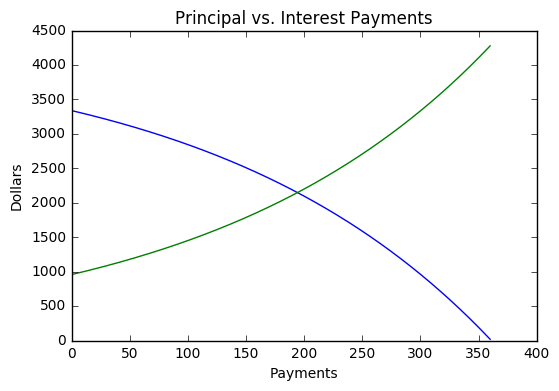

In [4]:
plt.plot(amor["index"], amor["interest"])
plt.plot(amor["index"], amor["applied"])
plt.xlabel("Payments")
plt.ylabel("Dollars")
plt.title('Principal vs. Interest Payments')
plt.show()

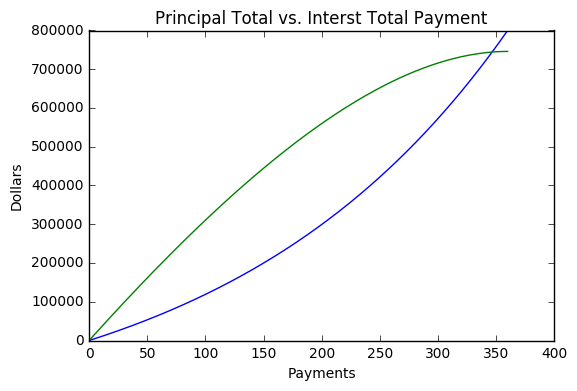

In [5]:
plt.plot(amor["index"], amor["total_pay"])
plt.plot(amor["index"], amor["total_int"])
plt.xlabel("Payments")
plt.ylabel("Dollars")
plt.title("Principal Total vs. Interst Total Payment")
plt.show()

In [11]:
def amortization_table_extra_payments(principal, rate, payments, payments_year):
    """
       Prints the amortization table for a loan.
       
       Prints the amortization table for a loan given 
       the principal, the interest rate (as an APR), and
       the term (in months).
    """
    
    amortization = {"index": [],
                    "begBal": [],
                    "payment": [],
                    "applied": [],
                    "interest": [],
                    "endBal": [],
                    "total_pay": [],
                    "total_int": [],
                    }
    
    payment = pmt(principal, rate, payments)
    print("Payment: {}".format(payment))
    begBal = principal
    total_int = 0
    total_pay = 0
    
    # Print headers
    print('Pmt no'.rjust(6), ' ', 'Beg. bal.'.ljust(13), end=' ')
    print('Payment'.ljust(9), ' ', 'Principal'.ljust(9), end=' ')
    print('Interest'.rjust(11), ' ', 'End. bal.'.ljust(11), end='')
    print('Total Pay'.rjust(12), ' ', 'Total Int'.rjust(12))
    print(''.rjust(6, '-'), ' ', ''.ljust(13, '-'), end=' ')
    print(''.rjust(11, '-'), ' ', ''.ljust(9, '-'), end=' ')
    print(''.rjust(9, '-'), ' ', ''.ljust(13, '-'), end=' ')
    print(''.rjust(12, '-'), ' ', ''.rjust(12, '-'))
    
    # Print Data
    for num in range(1, payments + 1):
        if num == 1 or num % 48 == 0:
            payment = 100000
        else:
            payment = pmt(principal, rate, payments)
        
        interest = round(begBal * (rate / (payments_year * 100.0)), 2)
        applied = round(payment - interest, 2)
        endBal = round(begBal - applied, 2)
        total_pay += applied
        total_int += interest
        
        print(str(num).center(6), end=' ')
        print('{0:,.2f}'.format(begBal).rjust(13), end=" ")
        print('{0:,.2f}'.format(payment).rjust(11), end=" ")
        print('{0:,.2f}'.format(applied).rjust(11), end=" ")
        print('{0:,.2f}'.format(interest).rjust(11), end=' ')
        print('{0:,.2f}'.format(endBal).rjust(13), end=' ')
        print('{0:,.2f}'.format(total_pay).rjust(12), end=' ')
        print('{0:,.2f}'.format(total_int).rjust(12))
        
        amortization["index"].append(num)
        amortization["begBal"].append(begBal)
        amortization["payment"].append(payment)
        amortization["applied"].append(applied)
        amortization["interest"].append(interest)
        amortization["endBal"].append(endBal)
        amortization["total_pay"].append(total_pay)
        amortization["total_int"].append(total_int)
        begBal = endBal
        
    return amortization

    
amor = amortization_table_extra_payments(800000, 5, 360, 12)

Payment: 4294.57
Pmt no   Beg. bal.     Payment     Principal    Interest   End. bal.     Total Pay      Total Int
------   ------------- -----------   --------- ---------   ------------- ------------   ------------
  1       800,000.00  100,000.00   96,666.67    3,333.33    703,333.33    96,666.67     3,333.33
  2       703,333.33    4,294.57    1,364.01    2,930.56    701,969.32    98,030.68     6,263.89
  3       701,969.32    4,294.57    1,369.70    2,924.87    700,599.62    99,400.38     9,188.76
  4       700,599.62    4,294.57    1,375.40    2,919.17    699,224.22   100,775.78    12,107.93
  5       699,224.22    4,294.57    1,381.14    2,913.43    697,843.08   102,156.92    15,021.36
  6       697,843.08    4,294.57    1,386.89    2,907.68    696,456.19   103,543.81    17,929.04
  7       696,456.19    4,294.57    1,392.67    2,901.90    695,063.52   104,936.48    20,830.94
  8       695,063.52    4,294.57    1,398.47    2,896.10    693,665.05   106,334.95    23,727.04
  9     

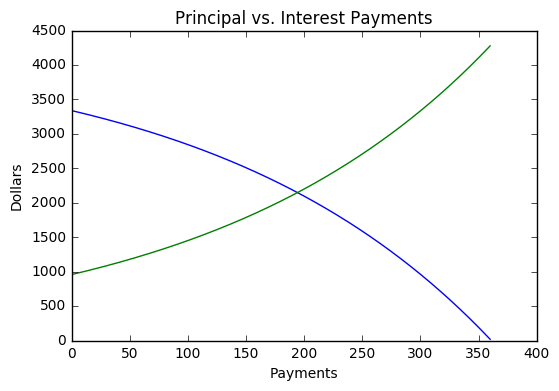

In [7]:
plt.plot(amor["index"], amor["interest"])
plt.plot(amor["index"], amor["applied"])
plt.xlabel("Payments")
plt.ylabel("Dollars")
plt.title('Principal vs. Interest Payments')
plt.show()

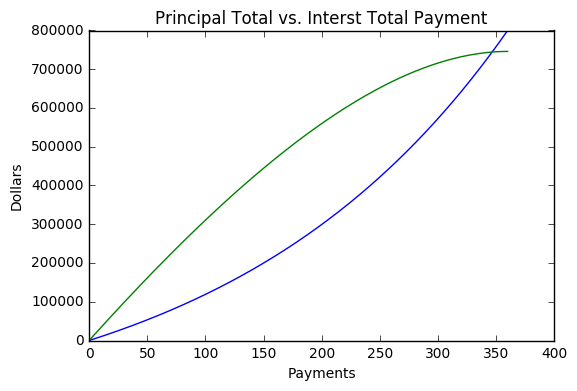

In [8]:
plt.plot(amor["index"], amor["total_pay"])
plt.plot(amor["index"], amor["total_int"])
plt.xlabel("Payments")
plt.ylabel("Dollars")
plt.title("Principal Total vs. Interst Total Payment")
plt.show()